# <u>Car Evaluation<u>

In [1]:
import pandas as pd
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

from src.visualize_coefficients import visualize_coefficients

### <u>Summary<u>

We will be training a model to predict the price of a car using the given features: maintenance, number of doors, number of people that can fit in the car, car trunk space, safety and class.

### <u> Introduction<u>

When making large purchases, it is incredibly important to consider all of the factors that go into the pricing and decision to commit to buying. With a rise in car prices, this is an essential consideration. There are several factors that influence the price of a car, for example brand, size, safety, etc. The overall safety of a car increases the cost, because of individual features and equipment, including backup cameras, video displays and automatic emergency braking. When purchasing a vehicle, you are not only investing in the price of the car itself, but the cost of insurance, which is also influenced by a number of features. On average, the insurance cost for a 4-door car is cheaper than a 2-door, because of the target buyers, sticker and repair costs, etc. As 2-door cars are typically sports and luxury cars, the materials and technology used to manufacture them will likely be luxury as well. Following the same line of reasoning, the maintenance of a luxury car is expected to be more expensive. The maintenance cost is likely to be a large influential factor in the price, because it can account for above 30% of the total cost.

We are interested in determining the relationship between the buying price of a car and its' maintenance cost, number of doors, capacity, safety, the size of the luggage boot (trunk) and class. Therefore, the question we will be exploring in this analysis is: do these factors influence the cost of buying a car, and how? To study these relationships, we will be using the Car Evaluation dataset obtained from UC Irvine Machine Learning Repository. This dataset contains information about all of the explanatory variables for our analysis and buying price, represented as categorical values. Based on our initial research, we expect that maintenance and safety will be highly correlated with the buying price. 


&nbsp;

### <u> Methods & Results <u>

&nbsp;

In [2]:
# loading dataset in a readable dataframe
car_table = pd.read_table('data/car.data', sep = ",", header=None, names = ["price", "maint", "doors", "persons", "lug_boot", "safety", "class"],)
car_table.style.set_caption('Table 1')
car_table

,price,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


Table 1. Dataframe of car dataset
&nbsp;


&nbsp;

In [3]:
# checks to see if there are any nulls/nan values in the dataframe
car_table.isnull().values.any()

False

<Figure size 1200x960 with 0 Axes>

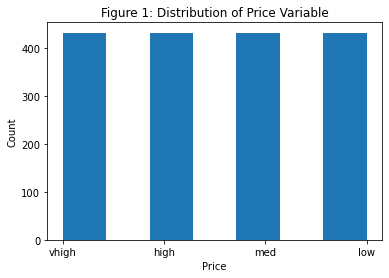

<Figure size 1200x960 with 0 Axes>

In [4]:
price = pd.DataFrame(car_table["price"])

# price.value_counts().plot(kind='bar')
plt.hist(price, bins=7)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Figure 1: Distribution of Price Variable")
plt.figure(figsize=(15, 12), dpi= 80)

No class imbalances.
&nbsp;



&nbsp;

In [5]:
# categorizing features(price, maint, doors, persons, lug_boot, safety, class) to be used a in column transformer to enable easy manipulation of data frame

ordinal_feats = ["price", "maint", "doors", "persons", "lug_boot", "safety", "class"]

# categories of each feature
maint_levels = ['low', 'med', 'high', 'vhigh']
doors_levels = ['2', '3', '4', '5more']
persons_levels = ['2', '4', 'more']
boot_levels = ['small', 'med', 'big']
safety_levels = ['low', 'med', 'high']
class_levels = ['unacc', 'acc', 'good', 'vgood']


# ordinal encoding of each feature
column_transformer = make_column_transformer(
    (OrdinalEncoder(categories=[maint_levels, maint_levels, doors_levels, persons_levels, boot_levels, safety_levels, class_levels],
                    dtype = int),
                    ordinal_feats)
)

X_transformed = column_transformer.fit_transform(car_table)
column_names = (ordinal_feats)



In [6]:
# creating new table after data preprcoessing 
new_table = pd.DataFrame(X_transformed, columns=column_names)

# splitting of target variable and features
X_car = new_table.drop(columns=["price"])
Y_car = new_table['price']


# splitting of data frame into training and testing data
X_train, X_Test, y_train, y_test = train_test_split(X_car, Y_car, test_size=0.2, random_state=1)

# features used for modeling
feats = ["maint", "doors", "persons", "lug_boot", "safety", "class"]

In [7]:
# fitting model for classification analysis

lr = LogisticRegression(max_iter=1000, C=100)
lr.fit(X_train, y_train)

coeffs = lr.coef_[3]

score = cross_validate(lr, X_Test, y_test, cv=10)

pd.DataFrame(score)


,fit_time,score_time,test_score
0,0.014000,0.001000,0.371429
1,0.013517,0.001000,0.257143
2,0.014000,0.001000,0.314286
3,0.012999,0.001000,0.285714
4,0.013001,0.001001,0.228571
5,0.013999,0.001001,0.342857
6,0.012999,0.001000,0.205882
7,0.013001,0.001001,0.323529
8,0.013999,0.000999,0.352941
9,0.014001,0.001000,0.441176


Table 2. Cross-validation scores 10-folds
&nbsp;


&nbsp;

In [8]:
# coefficients of each feature


data = {"features":feats, "coefficient":coeffs}
df1 = pd.DataFrame(data).sort_values(by=['coefficient'])
pd.DataFrame(data)


,features,coefficient
0,maint,-0.149224
1,doors,0.017235
2,persons,0.309111
3,lug_boot,0.104307
4,safety,0.400069
5,class,-1.163577


Table 3. Feature Coefficients
&nbsp;


&nbsp;

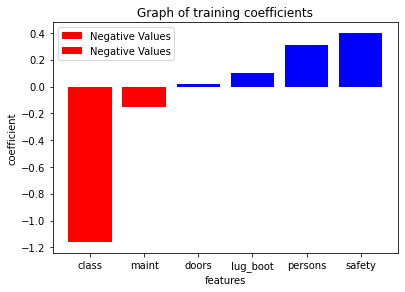

In [9]:
df1 = df1.sort_values(by=['coefficient'])

fig = visualize_coefficients(df1, "Graph of training coefficients", 'features', 'coefficient')

&nbsp;

&nbsp;

### <u>Discussion<u>

We have found that higher values of class and maintenance features decrease the value of the vehicle. While safety and the higher number of people that can fit in the car increase the value of the car the most. It was not what we expected because the value of the vehicle being increased by more people is subjective. Some people may value having more seats in a car than others due to personal preference. Moreover, we cannot use this model to discuss the impacts of such findings because the accuracy of the model needs to be increased a lot more before anything can be reasonably/confidently inferred from it. In the future, we can see if adding more features such as horsepower or branding of the car affects the value of the vehicle. It would also be interesting to see if introducing more categories in our target variable would increase the accuracy of the model.

&nbsp;

&nbsp;

### <u>References<u>

1 Capparella, J. (2021, November 29). New car prices are skyrocketing this spring. Car and 
Driver. Retrieved February 19, 2022, from https://www.caranddriver.com/news/a36342329/new-cars-expensive-prices/ 

2 Henry, J. (2021, November 11). Average new car price tops $45,000, used car price over 
$25,000. Forbes. Retrieved February 19, 2022, from https://www.forbes.com/wheels/news/new-car-price-tops-45000/ 

3 Vallet, M. (2021, February 25). Insurance for 2-door car versus 4-door car. Carinsurance.com. 
Retrieved February 19, 2022, from https://www.carinsurance.com/2-door-vs-4-door.aspx 

4 Ltd., T. I. (2020, June 27). How much does car maintenance cost? Car Maintenance Cost | 
What Is The Average Car Maintenance Cost? Retrieved February 19, 2022, from https://www.thinkinsure.ca/insurance-help-centre/car-maintenance-cost.html 
5 Vehicle maintenance: Cost relationship and estimating ... (n.d.). Retrieved February 19, 2022, 
from https://onlinepubs.trb.org/Onlinepubs/trr/1987/1140/1140-001.pdf 

6 Car Evaluation. (1997). UCI Machine Learning Repository.
